## Выполнение практического задания к уроку №5
### Тема “Элементы теории вероятностей”

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

from math import factorial as fact

### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

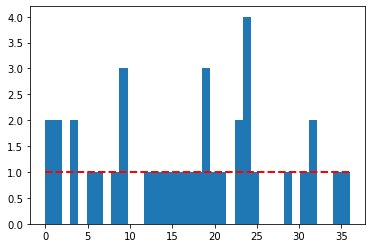

In [2]:
np.random.seed(0)

tries = 37
slots = 37

rulett_num = np.random.randint(0, slots, tries)

count, bins, patches = plt.hist(rulett_num, slots)
avarage = np.full(slots + 1, tries / slots)
plt.plot(bins, avarage, 'r--', linewidth=2)

### 2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки

In [3]:
def flip_coin():
    x = np.random.uniform(0, 10)
    if x < 5:
        return 1
    else:
        return 0

In [4]:
np.random.uniform(0, 10)

1.0590760718779213

#### Проверим вероятность выпадения двух орлов (0.25).  P(AB) = P(A) * P(B)

In [5]:
turns = 10000
count = 0

for i in range(turns):
    coin1 = flip_coin()
    coin2 = flip_coin()
    if coin1 == 1 and coin2 == 1:
        count += 1
        
print(f'Два орла выпали с вероятностью {count/turns} vs. 0.25')

Два орла выпали с вероятностью 0.2453 vs. 0.25


### 2.2 Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.**

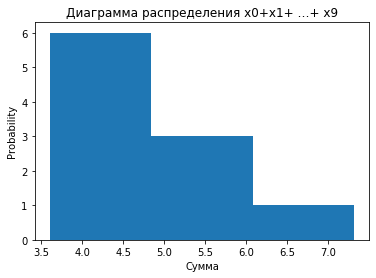

In [6]:
x = np.random.rand(10,10)
plt.hist(x.sum(axis=1), 3);
plt.ylabel('Probability')
plt.xlabel('Сумма')
plt.title('Диаграмма распределения х0+х1+ …+ x9');

Text(0.5, 1.0, 'Диаграмма распределения х0+х1+ …+ х1000')

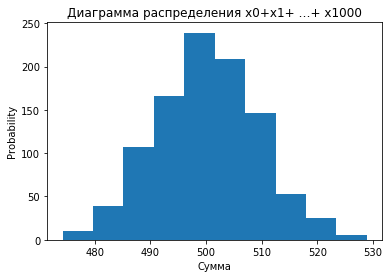

In [7]:
x = np.random.rand(1000,1000)
plt.hist(x.sum(axis=1), 10);
plt.ylabel('Probability')
plt.xlabel('Сумма')
plt.title('Диаграмма распределения х0+х1+ …+ х1000')

### 3.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [8]:
def mc_test(turns=100, n=2, k=1):
    m = np.random.randint(0, 2, size=(n, turns))
    m_sum = np.isin(np.sum(m, axis=0), k).sum()
    print(f'{k} успешных событий произошло {m_sum} раз из {turns} испытаний')
    print(f'Вероятность {k} успешных событий = {m_sum/turns}')

In [9]:
mc_test(turns=100000, n=4, k=2)

2 успешных событий произошло 37619 раз из 100000 испытаний
Вероятность 2 успешных событий = 0.37619


#### Проверка:<br>
$P_{n}(k)=C\binom{k}{n}\frac{1}{2^n}=\frac{4!}{2!(4-2)!}*\frac{1}{2^{4}}=\frac{3}{8}=0.375$

### 3.2 Повторите расчеты, взяв другие значения n и k.**

In [10]:
mc_test(turns=1000000, n=42, k=7)

7 успешных событий произошло 10 раз из 1000000 испытаний
Вероятность 7 успешных событий = 1e-05


### 4.  Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [11]:
examples = []
for p in itertools.permutations('0123456789', 10):
    examples.append(''.join(str(x) for x in p))

print(examples[-5:-1])
len(examples)

['9876543021', '9876543102', '9876543120', '9876543201']


3628800

In [12]:
examples = []
for p in itertools.permutations('0123456789', 2):
    examples.append(''.join(str(x) for x in p))

print(examples[-5:-1])
len(examples)

['94', '95', '96', '97']


90

In [13]:
examples = []
for p in itertools.combinations('0123456789', 2):
    examples.append(''.join(str(x) for x in p))

print(examples[-5:-1])
len(examples)

['68', '69', '78', '79']


45

### 5. Дополните код расчетом коэффициента корреляции x и y по формуле
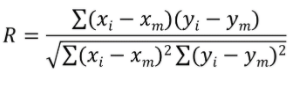

Матрица корреляции:
[[1.         0.91918476]
 [0.91918476 1.        ]]


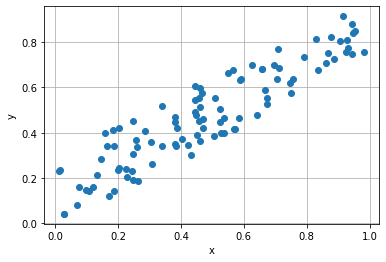

In [14]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
c = np.corrcoef(x, y)
print(f'Матрица корреляции:\n{c}')

#### Проверка

In [15]:
xm = np.sum(x) / n
ym = np.sum(y) / n
np.sum( (x - xm)*(y - ym) ) / np.sqrt( np.sum((x - xm)**2) * np.sum((y - ym)**2) )

0.9191847582918525